In [10]:
import numpy as np
import pandas as pd
import os
from Bonds import Bonds
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data_dir = "data/final"
data = {}
for root, dirs, files in os.walk(data_dir):
    if files:
        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            start_date = pd.to_datetime(file.split('.')[0], format="mixed")
            bonds = Bonds(df, start_date)
            data[start_date] = bonds

D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  self._yield[self.zero_coupon.maturity_months] = 12 * np.log(
D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  return yield_1 + (time - time_1) * ((yield_2 - yield_1) / (time_2 - time_1))
D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  self._yield[self.zero_coupon.maturity_months] = 12 * np.log(
D:\Assignment\MAT1856\Assignment\Assignment 1\Bonds.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  return yield_1 + (time - time_1) * ((yield_2 - yield_1) / (time_2 - time_1))


[]

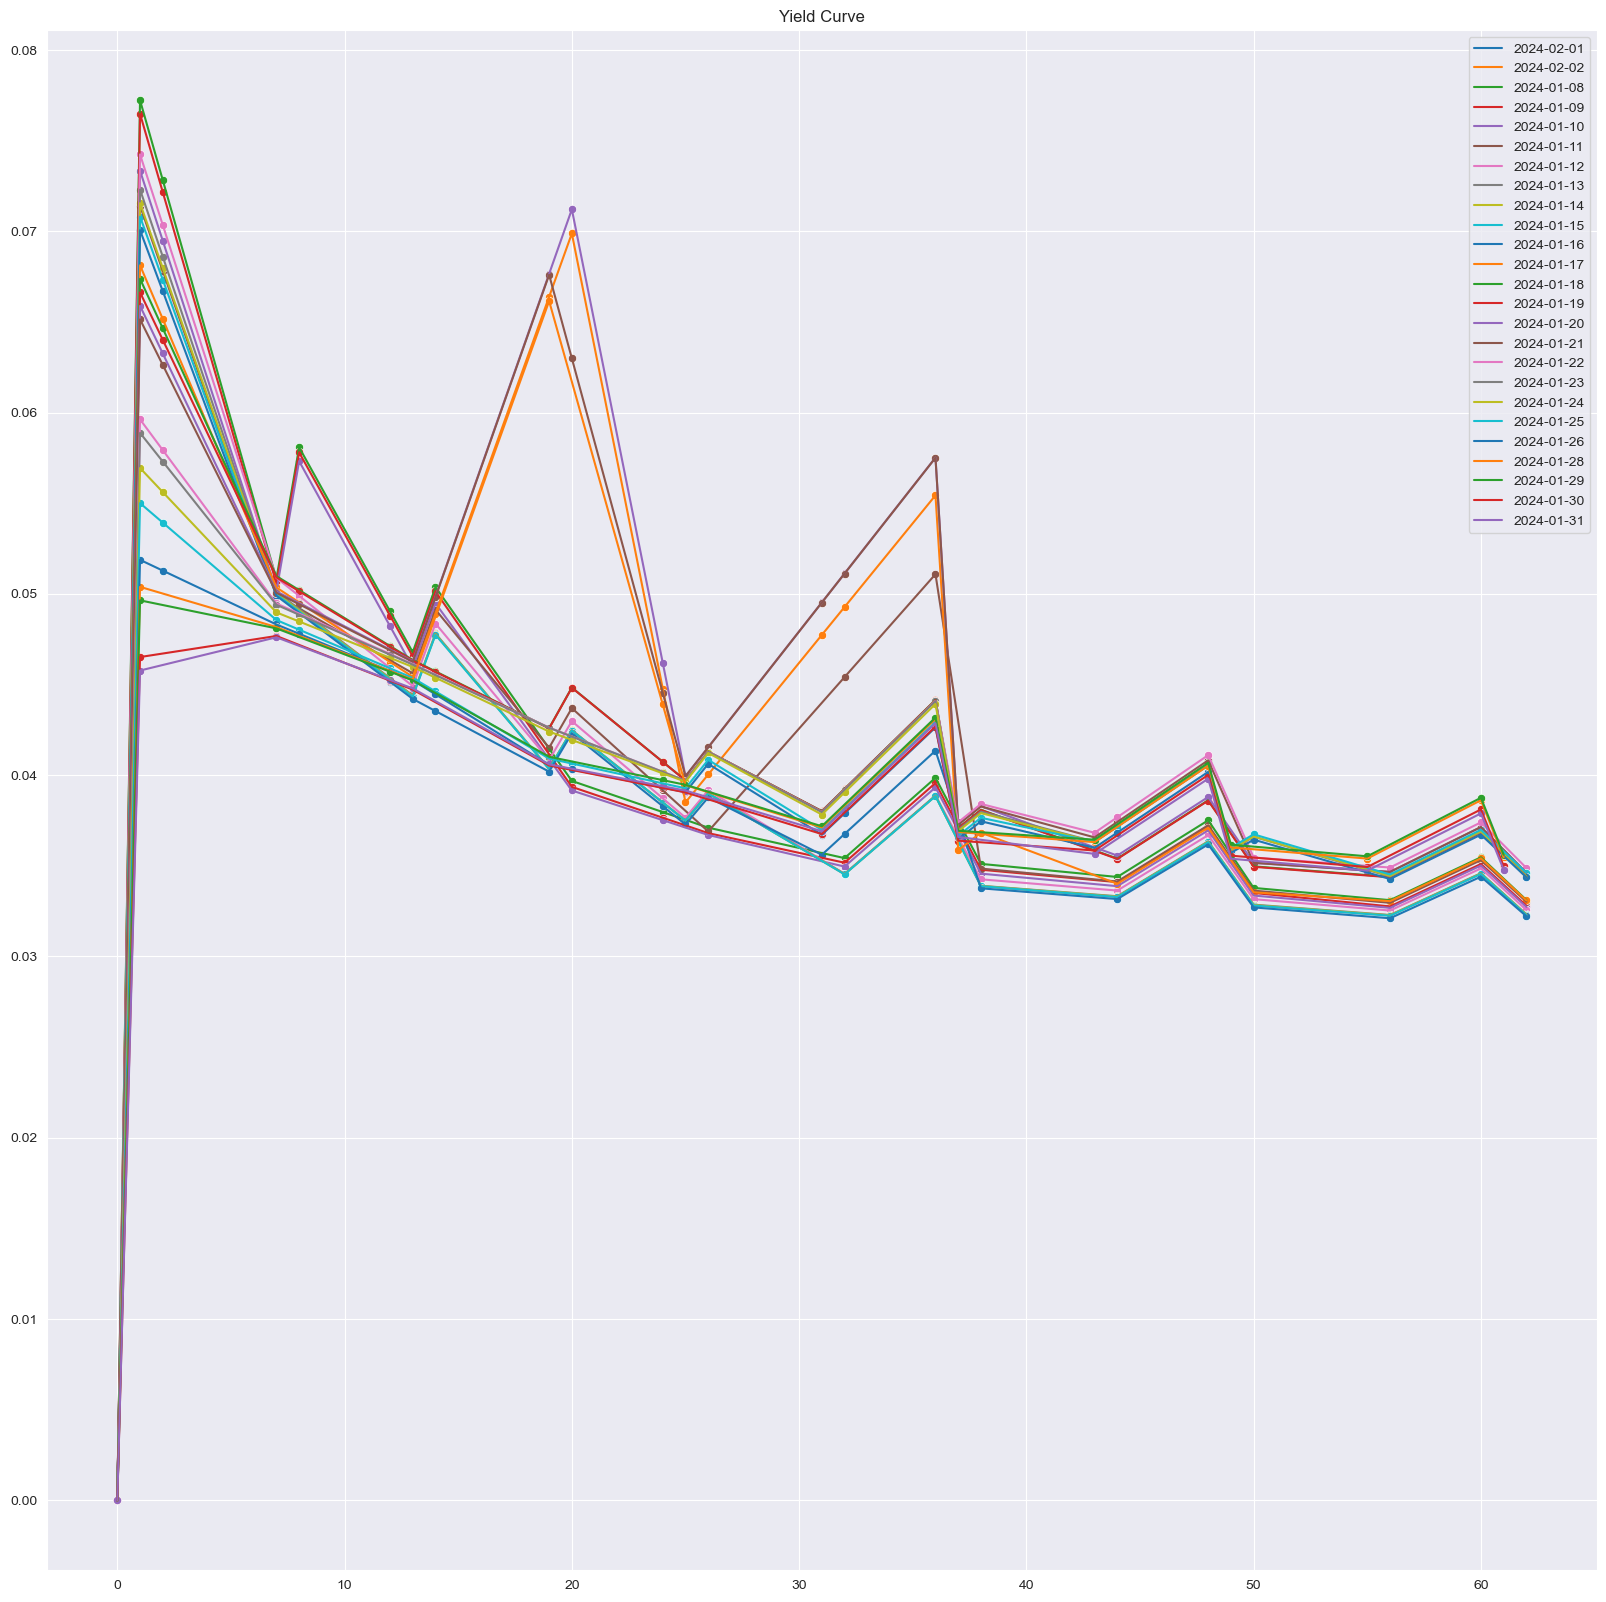

In [12]:
plt.figure(figsize=(20,20))
for date in data:
    _yields = data[date]._yield
    sns.scatterplot(x=_yields.keys(), y=_yields.values())
    sns.lineplot(x=_yields.keys(), y=_yields.values(), label=f"{pd.to_datetime(date, format='mixed').strftime('%Y-%m-%d')}")
plt.title("Yield Curve")
plt.plot()

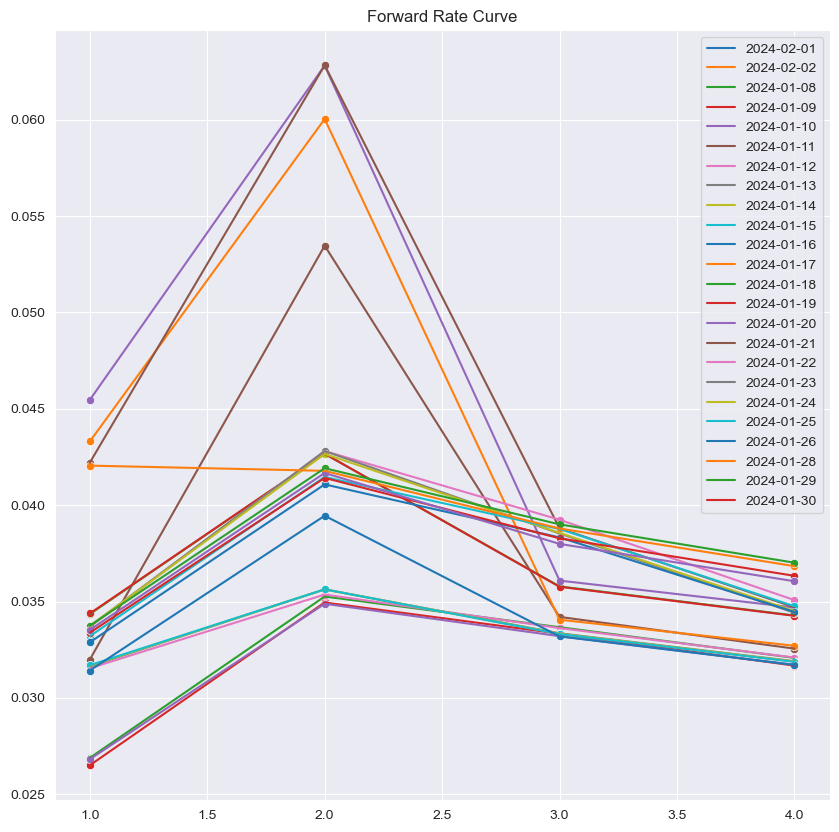

In [17]:
plt.figure(figsize=(10,10))
for date, bonds in data.items():
    x = []
    y = []
    for key, value in bonds.forward_rates.items():
        y.append(value)
        x.append(key[1]/12 - 1)
        if value < 0:
            print(date)
    # data = {"x":x, "y":y}
    sns.scatterplot(data=data, x=x, y=y)
    plt.plot(x, y, label=f"{pd.to_datetime(date, format='mixed').strftime('%Y-%m-%d')}")         
plt.title("Forward Rate Curve")
plt.show()